# 지적장애인을 위한 운동 처방 추천 서비스

In [ ]:
import pandas as pd 

In [ ]:
disabled_data = pd.read_csv("data/disabled_drop_nan2.csv", sep=",")
normal_data = pd.read_csv("data/normal_drop_nan2.csv", sep=",")

In [ ]:
disabled_1 = disabled_data[(disabled_data['label']==1) & (disabled_data['disabled_grade']=='1등급')]
disabled_2 = disabled_data[(disabled_data['label']==1) & (disabled_data['disabled_grade']=='2등급')]
disabled_3 = disabled_data[(disabled_data['label']==1) & (disabled_data['disabled_grade']=='3등급')]

In [ ]:
drop = ['disabled_type','disabled_grade']
disabled_1 = disabled_1.drop(drop, axis = 1).reset_index(drop=True)
disabled_2 = disabled_2.drop(drop, axis = 1).reset_index(drop=True)
disabled_3 = disabled_3.drop(drop, axis = 1).reset_index(drop=True)

In [ ]:
drop = ['exercise_prescription']
normal_data1 = normal_data.drop(drop, axis = 1).reset_index(drop=True)

In [ ]:
data1 = pd.concat([disabled_1,normal_data1])
data2 = pd.concat([disabled_2,normal_data1])
data3 = pd.concat([disabled_3,normal_data1])

In [ ]:
data1.columns = ['age',	'measure_time',	'sex',	'systolic_bp',	'diastolic_bp',	'height',	'Weight',	'BMI',	'body_fat',	'grip_power',	'sit_up',	'step_inspection',	'step_recover_time',	'bending_forward',	'label']
data2.columns = ['age',	'measure_time',	'sex',	'systolic_bp',	'diastolic_bp',	'height',	'Weight',	'BMI',	'body_fat',	'grip_power',	'sit_up',	'step_inspection',	'step_recover_time',	'bending_forward',	'label']
data3.columns = ['age',	'measure_time',	'sex',	'systolic_bp',	'diastolic_bp',	'height',	'Weight',	'BMI',	'body_fat',	'grip_power',	'sit_up',	'step_inspection',	'step_recover_time',	'bending_forward',	'label']

## 1등급

In [ ]:
from pymatch.Matcher import Matcher
m = Matcher(data1[data1['label']==0], data1[data1['label']==1], yvar="label", exclude=['age','measure_time','step_inspection','step_recover_time'])

Formula:
label ~ BMI+Weight+bending_forward+body_fat+diastolic_bp+grip_power+height+sex+sit_up+systolic_bp
n majority: 15305
n minority: 5640


In [ ]:
m.fit_scores(balance=True,nmodels=100)

Fitting Models on Balanced Samples: 100\100
Average Accuracy: 0.0%


In [ ]:
m.predict_scores()

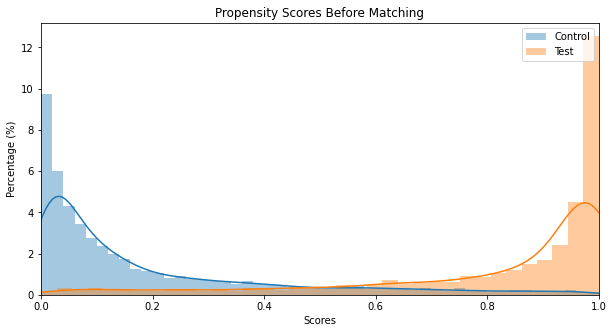

In [ ]:
m.plot_scores()

In [ ]:
m.match(method="min", nmatches=1, threshold=0.01)

In [ ]:
data1 = m.matched_data.sort_values("match_id")

In [ ]:
data1

,BMI,Weight,age,bending_forward,body_fat,diastolic_bp,grip_power,height,label,measure_time,sex,sit_up,step_inspection,step_recover_time,systolic_bp,scores,match_id,record_id
15305,19.3,43.2,49.0,-10.0,36.0,88.0,11.1,149.8,1,2019,1,6.0,47.4,89.0,133.0,0.992611,0,15305
579,22.0,56.3,18.0,0.0,30.1,71.0,5.6,160.0,0,2018,1,1.0,93.0,53.0,114.0,0.993932,0,579
15306,18.5,48.7,47.0,-3.0,21.5,100.0,6.0,162.4,1,2019,1,13.0,47.4,91.0,139.0,0.994907,1,15306
553,19.8,45.4,15.0,-6.0,28.3,81.0,9.9,151.5,0,2018,1,1.0,119.0,50.5,116.0,0.994523,1,553
15307,22.5,66.3,26.0,-0.2,20.4,77.0,22.4,171.6,1,2019,1,15.0,46.2,112.0,122.0,0.839395,2,15307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,41.1,120.4,14.0,7.0,50.1,73.0,5.4,171.1,0,2018,1,1.0,95.0,36.8,118.0,0.999524,5637,568
20943,24.5,74.3,34.0,-20.0,21.7,52.0,23.8,174.3,1,2021,1,11.0,45.5,88.0,129.0,0.896174,5638,20943
10082,23.8,64.3,13.0,-3.0,30.3,81.0,25.7,164.5,0,2021,1,6.0,143.0,44.3,121.0,0.896728,5638,10082
20944,21.9,50.6,50.0,16.8,36.7,86.0,17.5,151.9,1,2021,0,14.0,35.6,89.0,132.0,0.444879,5639,20944


In [ ]:
#data1.to_csv('/content/drive/MyDrive/new_data/data1.csv', index = None)

In [ ]:
num = list(data1[data1['label']==0].index)
exercise_prescription = pd.DataFrame(normal_data['exercise_prescription'][i] for i in num)

In [75]:
result1 = pd.concat([data1[data1['label']==1].reset_index(drop=True),exercise_prescription], axis=1)
result1.columns = ['BMI', 'Weight',	'age',	'bending_forward',	'body_fat',	'diastolic_bp',	'grip_power',	'height', 'label',	'measure_time',	'sex',	'sit_up',	'step_inspection',	'step_recover_time',	'systolic_bp',	'scores', 'match_id', 'record_id', 'exercise_prescription']
result1
#result1.to_csv('result1.csv', index = None)

,BMI,Weight,age,bending_forward,body_fat,diastolic_bp,grip_power,height,label,measure_time,sex,sit_up,step_inspection,step_recover_time,systolic_bp,scores,match_id,record_id,exercise_prescription
0,19.3,43.2,49.0,-10.0,36.0,88.0,11.1,149.8,1,2019.0,1.0,6.0,47.4,89.0,133.0,0.991376,0,2884332,"본운동:한발 연속 뛰기,뒤꿈치 높이들어 뛰기,무릎 높이 들어 뛰기,점프하며 뛰기,메..."
1,18.5,48.7,47.0,-3.0,21.5,100.0,6.0,162.4,1,2019.0,1.0,13.0,47.4,91.0,139.0,0.992535,1,2884333,"준비운동:정적 스트레칭 루틴프로그램,동적 스트레칭 루틴프로그램,몸통 들어올리기,팔..."
2,22.5,66.3,26.0,-0.2,20.4,77.0,22.4,171.6,1,2019.0,1.0,15.0,46.2,112.0,122.0,0.898405,2,2884334,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:합장하여 앞으로 숙이기,허리숙여 양팔..."
3,18.9,52.5,38.0,16.7,14.5,89.0,10.3,166.8,1,2019.0,1.0,10.0,48.9,92.0,134.0,0.967028,3,2884335,"준비운동:전신 루틴 스트레칭,한발 앞으로 내밀고 앉았다 일어서기,서서 상체 일으키기..."
4,22.6,59.2,36.0,-15.0,28.7,79.0,12.9,161.8,1,2019.0,1.0,7.0,51.4,66.0,127.0,0.994139,4,2884336,본운동:동적 스트레칭 루틴프로그램
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,18.5,50.8,41.0,-20.0,31.4,99.0,9.5,165.6,1,2021.0,1.0,1.0,42.3,130.0,152.0,0.998316,8274,2892606,"준비운동:줄넘기 운동,앉았다 일어서기,엉덩이 늘리기,짐볼 운동 루틴프로그램"
8275,21.7,47.2,38.0,-20.0,33.2,54.0,11.3,147.6,1,2021.0,1.0,2.0,42.0,123.0,105.0,0.994886,8275,2892607,"준비운동:하지 루틴 스트레칭1,하지 루틴 스트레칭2,전신 루틴 스트레칭,유산소 운동..."
8276,34.8,71.2,41.0,-20.0,49.4,83.0,11.3,143.0,1,2021.0,1.0,2.0,35.0,116.0,126.0,0.999538,8276,2892608,"준비운동:무릎굽혀 원 그리기,네발 걷기,다리 들어올리기,고양이 자세,옆구리 스트레칭..."
8277,24.5,74.3,34.0,-20.0,21.7,52.0,23.8,174.3,1,2021.0,1.0,11.0,45.5,88.0,129.0,0.931370,8277,2892609,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:웨이트 트레이닝 루틴프로그램,발 바..."


## 2등급

In [ ]:
from pymatch.Matcher import Matcher
m = Matcher(data2[data2['label']==0], data2[data2['label']==1], yvar="label", exclude=['age','measure_time','step_inspection','step_recover_time'])

Formula:
label ~ BMI+Weight+bending_forward+body_fat+diastolic_bp+grip_power+height+sex+sit_up+systolic_bp
n majority: 15305
n minority: 8116


In [ ]:
m.fit_scores(balance=True,nmodels=100)

Fitting Models on Balanced Samples: 100\100
Average Accuracy: 0.0%


In [ ]:
m.predict_scores()

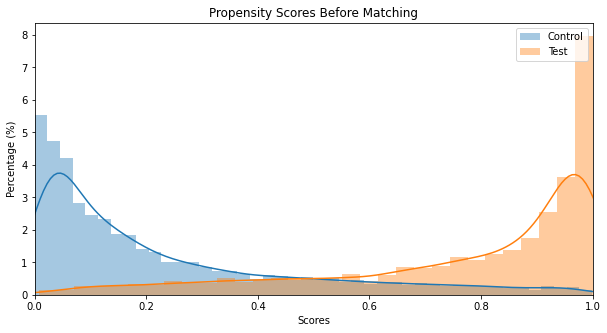

In [ ]:
m.plot_scores()

In [ ]:
m.match(method="min", nmatches=1, threshold=0.01)

In [ ]:
data2 = m.matched_data.sort_values("match_id")

In [ ]:
data2

,BMI,Weight,age,bending_forward,body_fat,diastolic_bp,grip_power,height,label,measure_time,sex,sit_up,step_inspection,step_recover_time,systolic_bp,scores,match_id,record_id
15305,28.7,67.8,54.0,10.6,35.7,96.0,21.0,153.8,1,2019,1,4.0,33.8,138.0,149.0,0.985637,0,15305
13040,34.8,88.7,15.0,6.0,49.2,79.0,10.8,159.7,0,2021,0,4.0,130.0,29.3,108.0,0.985891,0,13040
15306,20.7,43.7,28.0,11.0,17.7,78.0,14.1,145.4,1,2019,1,13.0,52.3,88.0,142.0,0.956499,1,15306
9724,26.6,74.3,13.0,-7.5,37.8,69.0,20.5,167.1,0,2021,1,12.0,142.0,42.4,117.0,0.956255,1,9724
15307,20.9,54.2,36.0,12.0,24.8,81.0,23.6,161.2,1,2019,1,23.0,48.2,95.0,115.0,0.703119,2,15307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078,20.8,35.2,16.0,11.0,34.1,77.0,5.9,130.2,0,2021,0,13.0,137.0,39.3,141.0,0.909185,8113,1078
23419,24.7,49.4,13.0,-0.5,37.8,72.0,11.2,141.5,1,2021,1,14.0,45.2,126.0,112.0,0.995173,8114,23419
593,25.2,75.0,16.0,-9.0,22.1,82.0,8.9,172.5,0,2018,1,1.0,83.0,50.4,131.0,0.994735,8114,593
23420,20.2,57.9,35.0,2.6,13.1,80.0,36.6,169.3,1,2021,1,20.0,47.4,90.0,120.0,0.350023,8115,23420


In [ ]:
#data2.to_csv('/content/drive/MyDrive/new_data/data2.csv', index = None)

In [ ]:
num = list(data2[data2['label']==0].index)
exercise_prescription = pd.DataFrame(normal_data['exercise_prescription'][i] for i in num)

In [77]:
result2 = pd.concat([data2[data2['label']==1].reset_index(drop=True),exercise_prescription], axis=1)
result2.columns = ['BMI', 'Weight',	'age',	'bending_forward',	'body_fat',	'diastolic_bp',	'grip_power',	'height', 'label',	'measure_time',	'sex',	'sit_up',	'step_inspection',	'step_recover_time',	'systolic_bp',	'scores', 'match_id', 'record_id', 'exercise_prescription']
result2
#result2.to_csv('result2.csv', index = None)

,BMI,Weight,age,bending_forward,body_fat,diastolic_bp,grip_power,height,label,measure_time,sex,sit_up,step_inspection,step_recover_time,systolic_bp,scores,match_id,record_id,exercise_prescription
0,28.7,67.8,54.0,10.6,35.7,96.0,21.0,153.8,1,2019.0,1.0,4.0,33.8,138.0,149.0,0.967958,0,2884332,"본운동:한발 연속 뛰기,뒤꿈치 높이들어 뛰기,무릎 높이 들어 뛰기,점프하며 뛰기,메..."
1,20.7,43.7,28.0,11.0,17.7,78.0,14.1,145.4,1,2019.0,1.0,13.0,52.3,88.0,142.0,0.942045,1,2884333,"준비운동:정적 스트레칭 루틴프로그램,동적 스트레칭 루틴프로그램,몸통 들어올리기,팔..."
2,20.9,54.2,36.0,12.0,24.8,81.0,23.6,161.2,1,2019.0,1.0,23.0,48.2,95.0,115.0,0.651839,2,2884334,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:합장하여 앞으로 숙이기,허리숙여 양팔..."
3,21.4,56.5,42.0,22.5,23.6,75.0,15.0,162.5,1,2019.0,0.0,20.0,37.5,90.0,118.0,0.230760,3,2884335,"준비운동:전신 루틴 스트레칭,한발 앞으로 내밀고 앉았다 일어서기,서서 상체 일으키기..."
4,20.5,49.8,23.0,16.0,33.6,70.0,16.4,155.7,1,2019.0,0.0,7.0,42.4,86.0,98.0,0.713805,4,2884336,본운동:동적 스트레칭 루틴프로그램
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11112,18.2,41.5,25.0,-37.0,24.4,78.0,16.9,151.1,1,2021.0,0.0,10.0,38.7,123.0,121.0,0.972719,11112,2895444,NaN
11113,18.7,44.2,30.0,20.9,11.8,64.0,25.6,153.7,1,2021.0,1.0,31.0,56.4,31.0,109.0,0.229157,11113,2895445,NaN
11114,27.4,68.7,24.0,8.3,42.2,83.0,8.5,158.3,1,2021.0,0.0,10.0,30.7,148.0,138.0,0.913671,11114,2895446,NaN
11115,24.7,49.4,13.0,-0.5,37.8,72.0,11.2,141.5,1,2021.0,1.0,14.0,45.2,126.0,112.0,0.992032,11115,2895447,NaN


## 3등급

In [ ]:
from pymatch.Matcher import Matcher
m = Matcher(data3[data3['label']==0], data3[data3['label']==1], yvar="label", exclude=['age','measure_time','step_inspection','step_recover_time'])

Formula:
label ~ BMI+Weight+bending_forward+body_fat+diastolic_bp+grip_power+height+sex+sit_up+systolic_bp
n majority: 15305
n minority: 5911


In [ ]:
m.fit_scores(balance=True,nmodels=100)

Fitting Models on Balanced Samples: 100\100
Average Accuracy: 0.0%


In [ ]:
m.predict_scores()

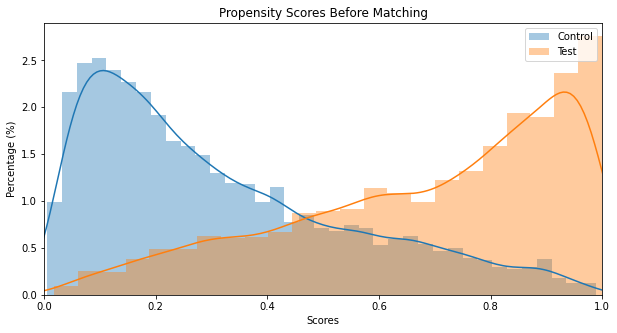

In [ ]:
m.plot_scores()

In [ ]:
m.match(method="min", nmatches=1, threshold=0.01)

In [ ]:
data3 = m.matched_data.sort_values("match_id")

In [ ]:
data3

,BMI,Weight,age,bending_forward,body_fat,diastolic_bp,grip_power,height,label,measure_time,sex,sit_up,step_inspection,step_recover_time,systolic_bp,scores,match_id,record_id
15305,21.0,43.8,51.0,18.0,33.9,74.0,12.0,144.5,1,2019,0,14.0,38.6,78.0,103.0,0.601199,0,15305
12537,18.6,38.6,15.0,2.5,35.9,72.0,17.7,144.1,0,2021,0,18.0,163.0,37.9,118.0,0.601266,0,12537
15306,25.8,72.6,24.0,3.7,42.1,80.0,19.7,167.8,1,2019,0,13.0,35.1,108.0,120.0,0.539023,1,15306
10955,25.6,61.1,17.0,18.5,41.3,80.0,24.3,154.4,0,2021,0,1.0,158.0,34.5,134.0,0.539142,1,10955
15307,18.8,55.0,25.0,3.6,18.9,80.0,17.4,171.2,1,2019,1,23.0,54.5,74.0,120.0,0.638907,2,15307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13472,27.1,66.9,14.0,14.0,36.9,85.0,21.1,157.0,0,2022,0,10.0,135.0,33.8,115.0,0.697334,5908,13472
21214,25.7,71.6,58.0,-4.5,20.1,75.0,45.4,167.0,1,2021,1,26.0,41.1,79.0,105.0,0.693131,5909,21214
14136,28.3,84.8,17.0,-6.5,28.5,76.0,37.0,173.0,0,2022,1,37.0,171.0,40.9,127.0,0.693063,5909,14136
21215,23.7,55.4,70.0,-15.0,38.5,78.0,11.3,152.8,1,2021,0,3.0,25.4,132.0,131.0,0.934637,5910,21215


In [ ]:
#data3.to_csv('/content/drive/MyDrive/new_data/data3.csv', index = None)

In [ ]:
num = list(data3[data3['label']==0].index)
exercise_prescription = pd.DataFrame(normal_data['exercise_prescription'][i] for i in num)

In [79]:
result3 = pd.concat([data3[data3['label']==1].reset_index(drop=True),exercise_prescription], axis=1)
result3.columns = ['BMI', 'Weight',	'age',	'bending_forward',	'body_fat',	'diastolic_bp',	'grip_power',	'height', 'label',	'measure_time',	'sex',	'sit_up',	'step_inspection',	'step_recover_time',	'systolic_bp',	'scores', 'match_id', 'record_id', 'exercise_prescription']
result3
#result3.to_csv('result3.csv', index = None)

,BMI,Weight,age,bending_forward,body_fat,diastolic_bp,grip_power,height,label,measure_time,sex,sit_up,step_inspection,step_recover_time,systolic_bp,scores,match_id,record_id,exercise_prescription
0,21.0,43.8,51.0,18.000,33.9,74.0,12.0,144.5,1,2019.0,0.0,14.00,38.600,78.00,103.0,0.481923,0,2884332,"본운동:한발 연속 뛰기,뒤꿈치 높이들어 뛰기,무릎 높이 들어 뛰기,점프하며 뛰기,메..."
1,25.8,72.6,24.0,3.700,42.1,80.0,19.7,167.8,1,2019.0,0.0,13.00,35.100,108.00,120.0,0.674072,1,2884333,"준비운동:정적 스트레칭 루틴프로그램,동적 스트레칭 루틴프로그램,몸통 들어올리기,팔..."
2,18.8,55.0,25.0,3.600,18.9,80.0,17.4,171.2,1,2019.0,1.0,23.00,54.500,74.00,120.0,0.700150,2,2884334,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:합장하여 앞으로 숙이기,허리숙여 양팔..."
3,25.3,72.2,44.0,-33.000,27.2,97.0,36.2,168.8,1,2019.0,1.0,10.00,45.600,76.00,136.0,0.987517,3,2884335,"준비운동:전신 루틴 스트레칭,한발 앞으로 내밀고 앉았다 일어서기,서서 상체 일으키기..."
4,22.8,59.1,23.0,-29.000,41.1,64.0,12.2,161.0,1,2019.0,0.0,16.00,38.700,102.00,95.0,0.895861,4,2884336,본운동:동적 스트레칭 루틴프로그램
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8833,25.7,71.6,58.0,-4.500,20.1,75.0,45.4,167.0,1,2021.0,1.0,26.00,41.100,79.00,105.0,0.590233,8833,2893165,NaN
8834,18.0,39.0,37.0,6.796,27.4,65.0,28.2,147.0,1,2021.0,0.0,21.69,39.564,94.50,111.0,0.272654,8834,2893166,NaN
8835,23.7,55.4,70.0,-15.000,38.5,78.0,11.3,152.8,1,2021.0,0.0,3.00,25.400,132.00,131.0,0.900025,8835,2893167,NaN
8836,21.0,55.2,61.0,8.806,29.5,86.0,26.4,162.0,1,2021.0,0.0,10.99,33.225,98.91,130.0,0.449913,8836,2893168,NaN


# 값 채워서 진행

In [ ]:
disabled_data = pd.read_csv("data/disabled_nan.csv", sep=",")
normal_data = pd.read_csv("data/normal_nan.csv", sep=",")

In [ ]:
disabled_1 = disabled_data[(disabled_data['label']==1) & (disabled_data['disabled_grade']=='1등급')]
disabled_2 = disabled_data[(disabled_data['label']==1) & (disabled_data['disabled_grade']=='2등급')]
disabled_3 = disabled_data[(disabled_data['label']==1) & (disabled_data['disabled_grade']=='3등급')]

In [ ]:
drop = ['disabled_type','disabled_grade']
disabled_1 = disabled_1.drop(drop, axis = 1).reset_index(drop=True)
disabled_2 = disabled_2.drop(drop, axis = 1).reset_index(drop=True)
disabled_3 = disabled_3.drop(drop, axis = 1).reset_index(drop=True)

In [ ]:
#pip install missingpy
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
imputer = MissForest()
disabled_1_imputed = imputer.fit_transform(disabled_1)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6


In [ ]:
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
imputer = MissForest()
disabled_2_imputed = imputer.fit_transform(disabled_2)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8


In [ ]:
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
imputer = MissForest()
disabled_3_imputed = imputer.fit_transform(disabled_3)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5


In [ ]:
#drop = ['exercise_prescription']
#normal_data1 = normal_data.drop(drop, axis = 1).reset_index(drop=True)

In [ ]:
#import sys
#import sklearn.neighbors._base
#sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
#from missingpy import MissForest
#imputer = MissForest()
#normal_data_imputed = imputer.fit_transform(normal_data1)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5


In [ ]:
disabled_1_imputed = pd.DataFrame(disabled_1_imputed, columns = ['age', 'measure_time', 'sex', 'systolic_bp','diastolic_bp', 'height', 'Weight', 'BMI', 'body_fat', 'grip_power','sit_up', 'step_inspection', 'step_recover_time', 'bending_forward','label'])
#normal_data_imputed = pd.DataFrame(normal_data_imputed, columns = ['age', 'measure_time', 'sex', 'height', 'Weight','body_fat', 'diastolic_bp', 'systolic_bp', 'grip_power', 'BMI','sit_up', 'bending_forward', 'step_inspection', 'step_recover_time','label'])
disabled_2_imputed = pd.DataFrame(disabled_2_imputed, columns = ['age', 'measure_time', 'sex', 'systolic_bp','diastolic_bp', 'height', 'Weight', 'BMI', 'body_fat', 'grip_power','sit_up', 'step_inspection', 'step_recover_time', 'bending_forward','label'])
disabled_3_imputed = pd.DataFrame(disabled_3_imputed, columns = ['age', 'measure_time', 'sex', 'systolic_bp','diastolic_bp', 'height', 'Weight', 'BMI', 'body_fat', 'grip_power','sit_up', 'step_inspection', 'step_recover_time', 'bending_forward','label'])

In [ ]:
#csv파일로 생성
disabled_1_imputed.to_csv('disabled_1_imputed.csv', index = None)
disabled_2_imputed.to_csv('disabled_2_imputed.csv', index = None)
disabled_3_imputed.to_csv('disabled_3_imputed.csv', index = None)
#normal_data_imputed.to_csv('normal_data_imputed.csv', index = None) 

In [2]:
disabled_1_imputed = pd.read_csv("data/disabled_1_imputed.csv", sep=",")
disabled_2_imputed = pd.read_csv("data/disabled_2_imputed.csv", sep=",")
disabled_3_imputed = pd.read_csv("data/disabled_3_imputed.csv", sep=",")
normal_data_imputed = pd.read_csv("data/normal_data_imputed.csv", sep=",")

In [3]:
data1 = pd.concat([disabled_1_imputed,normal_data_imputed])
data2 = pd.concat([disabled_2_imputed,normal_data_imputed])
data3 = pd.concat([disabled_3_imputed,normal_data_imputed])

In [32]:
normal_data = pd.read_csv("data/normal_nan.csv", sep=",")

In [52]:
len(normal_data)

2884332

## 1등급

In [4]:
#pip install git+https://github.com/benmiroglio/pymatch
from pymatch.Matcher import Matcher
m = Matcher(data1[data1['label']==0], data1[data1['label']==1], yvar="label", exclude=['measure_time','step_inspection','step_recover_time'])

Formula:
label ~ BMI+Weight+age+bending_forward+body_fat+diastolic_bp+grip_power+height+sex+sit_up+systolic_bp
n majority: 2884332
n minority: 8279


In [5]:
m.fit_scores(balance=True,nmodels=100)

Fitting Models on Balanced Samples: 100\100
Average Accuracy: 0.0%


In [6]:
m.predict_scores()

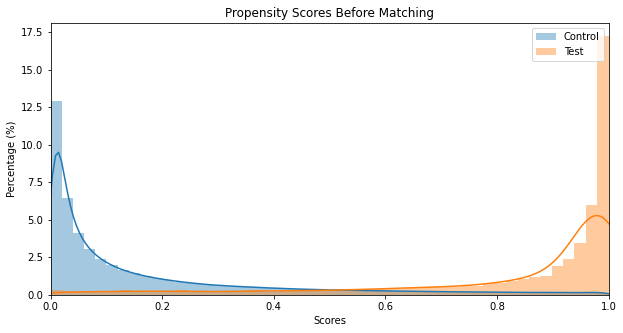

In [7]:
m.plot_scores()

In [8]:
m.match(method="min", nmatches=1, threshold=0.01)

In [9]:
data1 = m.matched_data.sort_values("match_id")

In [10]:
data1

,BMI,Weight,age,bending_forward,body_fat,diastolic_bp,grip_power,height,label,measure_time,sex,sit_up,step_inspection,step_recover_time,systolic_bp,scores,match_id,record_id
2884332,19.3,43.2,49.0,-10.0,36.0,88.0,11.1,149.8,1,2019.0,1.0,6.00,47.40,89.000,133.0,0.991376,0,2884332
900733,16.8,36.7,13.0,-1.9,17.7,80.0,1.5,148.0,0,2019.0,1.0,21.28,76.17,56.043,120.0,0.991374,0,900733
2884333,18.5,48.7,47.0,-3.0,21.5,100.0,6.0,162.4,1,2019.0,1.0,13.00,47.40,91.000,139.0,0.992535,1,2884333
919312,31.6,75.8,13.0,0.0,46.9,81.0,21.4,155.0,0,2019.0,1.0,3.00,94.66,47.209,120.0,0.992535,1,919312
2884334,22.5,66.3,26.0,-0.2,20.4,77.0,22.4,171.6,1,2019.0,1.0,15.00,46.20,112.000,122.0,0.898405,2,2884334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515171,33.4,104.0,18.0,-20.0,41.2,85.0,6.6,176.4,0,2017.0,1.0,10.25,113.33,41.680,138.0,0.999535,8276,515171
2892609,24.5,74.3,34.0,-20.0,21.7,52.0,23.8,174.3,1,2021.0,1.0,11.00,45.50,88.000,129.0,0.931370,8277,2892609
2036347,14.4,29.9,13.0,3.8,14.5,70.0,9.3,144.1,0,2017.0,1.0,22.00,101.28,55.343,120.0,0.931370,8277,2036347
2892610,21.9,50.6,50.0,16.8,36.7,86.0,17.5,151.9,1,2021.0,0.0,14.00,35.60,89.000,132.0,0.343596,8278,2892610


In [14]:
data1.to_csv('data1_imputed.csv', index = None)

In [50]:
num = list(data1[data1['label']==0].index)
exercise_prescription = pd.DataFrame(normal_data['exercise_prescription'][i] for i in num)

In [71]:
result1 = pd.concat([data1[data1['label']==1].reset_index(drop=True),exercise_prescription], axis=1)
result1.columns = ['BMI', 'Weight',	'age',	'bending_forward',	'body_fat',	'diastolic_bp',	'grip_power',	'height', 'label',	'measure_time',	'sex',	'sit_up',	'step_inspection',	'step_recover_time',	'systolic_bp',	'scores', 'match_id', 'record_id', 'exercise_prescription']
result1
#result1.to_csv('result1_imputed.csv', index = None)

,BMI,Weight,age,bending_forward,body_fat,diastolic_bp,grip_power,height,label,measure_time,sex,sit_up,step_inspection,step_recover_time,systolic_bp,scores,match_id,record_id,exercise_prescription
0,19.3,43.2,49.0,-10.0,36.0,88.0,11.1,149.8,1,2019.0,1.0,6.0,47.4,89.0,133.0,0.991376,0,2884332,"본운동:한발 연속 뛰기,뒤꿈치 높이들어 뛰기,무릎 높이 들어 뛰기,점프하며 뛰기,메..."
1,18.5,48.7,47.0,-3.0,21.5,100.0,6.0,162.4,1,2019.0,1.0,13.0,47.4,91.0,139.0,0.992535,1,2884333,"준비운동:정적 스트레칭 루틴프로그램,동적 스트레칭 루틴프로그램,몸통 들어올리기,팔..."
2,22.5,66.3,26.0,-0.2,20.4,77.0,22.4,171.6,1,2019.0,1.0,15.0,46.2,112.0,122.0,0.898405,2,2884334,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:합장하여 앞으로 숙이기,허리숙여 양팔..."
3,18.9,52.5,38.0,16.7,14.5,89.0,10.3,166.8,1,2019.0,1.0,10.0,48.9,92.0,134.0,0.967028,3,2884335,"준비운동:전신 루틴 스트레칭,한발 앞으로 내밀고 앉았다 일어서기,서서 상체 일으키기..."
4,22.6,59.2,36.0,-15.0,28.7,79.0,12.9,161.8,1,2019.0,1.0,7.0,51.4,66.0,127.0,0.994139,4,2884336,본운동:동적 스트레칭 루틴프로그램
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,18.5,50.8,41.0,-20.0,31.4,99.0,9.5,165.6,1,2021.0,1.0,1.0,42.3,130.0,152.0,0.998316,8274,2892606,"준비운동:줄넘기 운동,앉았다 일어서기,엉덩이 늘리기,짐볼 운동 루틴프로그램"
8275,21.7,47.2,38.0,-20.0,33.2,54.0,11.3,147.6,1,2021.0,1.0,2.0,42.0,123.0,105.0,0.994886,8275,2892607,"준비운동:하지 루틴 스트레칭1,하지 루틴 스트레칭2,전신 루틴 스트레칭,유산소 운동..."
8276,34.8,71.2,41.0,-20.0,49.4,83.0,11.3,143.0,1,2021.0,1.0,2.0,35.0,116.0,126.0,0.999538,8276,2892608,"준비운동:무릎굽혀 원 그리기,네발 걷기,다리 들어올리기,고양이 자세,옆구리 스트레칭..."
8277,24.5,74.3,34.0,-20.0,21.7,52.0,23.8,174.3,1,2021.0,1.0,11.0,45.5,88.0,129.0,0.931370,8277,2892609,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:웨이트 트레이닝 루틴프로그램,발 바..."


## 2등급

In [15]:
from pymatch.Matcher import Matcher
m = Matcher(data2[data2['label']==0], data2[data2['label']==1], yvar="label", exclude=['measure_time','step_inspection','step_recover_time'])

Formula:
label ~ BMI+Weight+age+bending_forward+body_fat+diastolic_bp+grip_power+height+sex+sit_up+systolic_bp
n majority: 2884332
n minority: 11117


In [16]:
m.fit_scores(balance=True,nmodels=100)

Fitting Models on Balanced Samples: 100\100
Average Accuracy: 0.0%


In [17]:
m.predict_scores()

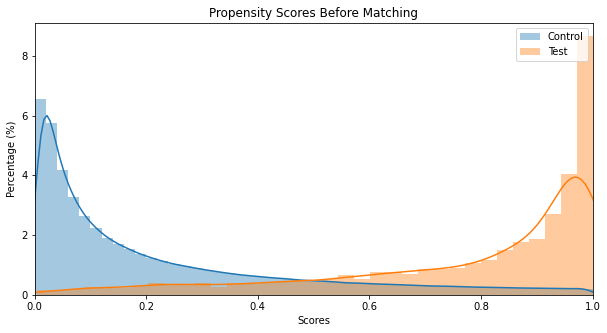

In [18]:
m.plot_scores()

In [19]:
m.match(method="min", nmatches=1, threshold=0.01)

In [20]:
data2 = m.matched_data.sort_values("match_id")

In [21]:
data2

,BMI,Weight,age,bending_forward,body_fat,diastolic_bp,grip_power,height,label,measure_time,sex,sit_up,step_inspection,step_recover_time,systolic_bp,scores,match_id,record_id
2884332,28.7,67.8,54.0,10.6,35.700,96.0,21.0,153.8,1,2019.0,1.0,4.00,33.80,138.00000,149.0,0.967958,0,2884332
506666,33.8,90.0,13.0,-2.0,48.400,89.0,22.6,163.1,0,2017.0,1.0,21.32,133.12,38.05600,142.0,0.967963,0,506666
2884333,20.7,43.7,28.0,11.0,17.700,78.0,14.1,145.4,1,2019.0,1.0,13.00,52.30,88.00000,142.0,0.942045,1,2884333
2610008,24.4,62.5,11.0,1.0,34.318,81.0,16.4,160.2,0,2021.0,1.0,26.00,111.42,47.01900,117.0,0.942045,1,2610008
2884334,20.9,54.2,36.0,12.0,24.800,81.0,23.6,161.2,1,2019.0,1.0,23.00,48.20,95.00000,115.0,0.651839,2,2884334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2786303,14.2,30.9,11.0,-10.8,17.423,74.0,9.9,147.5,0,2022.0,0.0,15.00,106.75,44.81200,110.0,0.913672,11114,2786303
2895447,24.7,49.4,13.0,-0.5,37.800,72.0,11.2,141.5,1,2021.0,1.0,14.00,45.20,126.00000,112.0,0.992032,11115,2895447
1260866,27.7,64.2,31.0,-16.7,28.200,105.0,14.5,152.3,0,2015.0,0.0,7.59,72.29,40.34211,138.0,0.992031,11115,1260866
2895448,20.2,57.9,35.0,2.6,13.100,80.0,36.6,169.3,1,2021.0,1.0,20.00,47.40,90.00000,120.0,0.464850,11116,2895448


In [22]:
data2.to_csv('data2_imputed.csv', index = None)

In [36]:
num = list(data2[data2['label']==0].index)
exercise_prescription = pd.DataFrame(normal_data['exercise_prescription'][i] for i in num)

In [72]:
result2 = pd.concat([data2[data2['label']==1].reset_index(drop=True),exercise_prescription], axis=1)
result2.columns = ['BMI', 'Weight',	'age',	'bending_forward',	'body_fat',	'diastolic_bp',	'grip_power',	'height', 'label',	'measure_time',	'sex',	'sit_up',	'step_inspection',	'step_recover_time',	'systolic_bp',	'scores', 'match_id', 'record_id', 'exercise_prescription']
result2
#result2.to_csv('result2_imputed.csv', index = None)

,BMI,Weight,age,bending_forward,body_fat,diastolic_bp,grip_power,height,label,measure_time,sex,sit_up,step_inspection,step_recover_time,systolic_bp,scores,match_id,record_id,exercise_prescription
0,28.7,67.8,54.0,10.6,35.7,96.0,21.0,153.8,1,2019.0,1.0,4.0,33.8,138.0,149.0,0.967958,0,2884332,"본운동:한발 연속 뛰기,뒤꿈치 높이들어 뛰기,무릎 높이 들어 뛰기,점프하며 뛰기,메..."
1,20.7,43.7,28.0,11.0,17.7,78.0,14.1,145.4,1,2019.0,1.0,13.0,52.3,88.0,142.0,0.942045,1,2884333,"준비운동:정적 스트레칭 루틴프로그램,동적 스트레칭 루틴프로그램,몸통 들어올리기,팔..."
2,20.9,54.2,36.0,12.0,24.8,81.0,23.6,161.2,1,2019.0,1.0,23.0,48.2,95.0,115.0,0.651839,2,2884334,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:합장하여 앞으로 숙이기,허리숙여 양팔..."
3,21.4,56.5,42.0,22.5,23.6,75.0,15.0,162.5,1,2019.0,0.0,20.0,37.5,90.0,118.0,0.230760,3,2884335,"준비운동:전신 루틴 스트레칭,한발 앞으로 내밀고 앉았다 일어서기,서서 상체 일으키기..."
4,20.5,49.8,23.0,16.0,33.6,70.0,16.4,155.7,1,2019.0,0.0,7.0,42.4,86.0,98.0,0.713805,4,2884336,본운동:동적 스트레칭 루틴프로그램
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11112,18.2,41.5,25.0,-37.0,24.4,78.0,16.9,151.1,1,2021.0,0.0,10.0,38.7,123.0,121.0,0.972719,11112,2895444,NaN
11113,18.7,44.2,30.0,20.9,11.8,64.0,25.6,153.7,1,2021.0,1.0,31.0,56.4,31.0,109.0,0.229157,11113,2895445,NaN
11114,27.4,68.7,24.0,8.3,42.2,83.0,8.5,158.3,1,2021.0,0.0,10.0,30.7,148.0,138.0,0.913671,11114,2895446,NaN
11115,24.7,49.4,13.0,-0.5,37.8,72.0,11.2,141.5,1,2021.0,1.0,14.0,45.2,126.0,112.0,0.992032,11115,2895447,NaN


## 3등급

In [23]:
from pymatch.Matcher import Matcher
m = Matcher(data3[data3['label']==0], data3[data3['label']==1], yvar="label", exclude=['measure_time','step_inspection','step_recover_time'])

Formula:
label ~ BMI+Weight+age+bending_forward+body_fat+diastolic_bp+grip_power+height+sex+sit_up+systolic_bp
n majority: 2884332
n minority: 8838


In [24]:
m.fit_scores(balance=True,nmodels=100)

Fitting Models on Balanced Samples: 100\100
Average Accuracy: 0.0%


In [25]:
m.predict_scores()

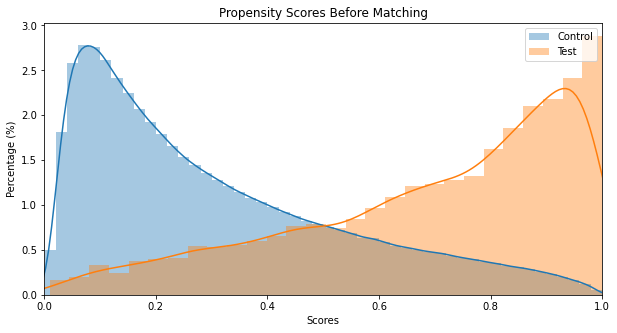

In [26]:
m.plot_scores()

In [27]:
m.match(method="min", nmatches=1, threshold=0.01)

In [28]:
data3 = m.matched_data.sort_values("match_id")

In [29]:
data3

,BMI,Weight,age,bending_forward,body_fat,diastolic_bp,grip_power,height,label,measure_time,sex,sit_up,step_inspection,step_recover_time,systolic_bp,scores,match_id,record_id
2884332,21.0,43.8,51.0,18.000,33.9,74.0,12.0,144.5,1,2019.0,0.0,14.00,38.600,78.000,103.0,0.481923,0,2884332
1214127,16.7,38.5,13.0,7.000,24.0,58.0,17.5,152.0,0,2022.0,0.0,13.00,80.690,45.867,112.0,0.481923,0,1214127
2884333,25.8,72.6,24.0,3.700,42.1,80.0,19.7,167.8,1,2019.0,0.0,13.00,35.100,108.000,120.0,0.674072,1,2884333
2544740,21.4,59.0,21.0,-6.400,15.8,83.0,31.1,166.0,0,2019.0,1.0,35.28,86.490,52.451,115.0,0.674072,1,2544740
2884334,18.8,55.0,25.0,3.600,18.9,80.0,17.4,171.2,1,2019.0,1.0,23.00,54.500,74.000,120.0,0.700150,2,2884334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913073,22.4,54.4,13.0,5.200,38.2,85.0,19.6,155.9,0,2019.0,0.0,2.00,104.760,40.619,123.0,0.900022,8835,913073
2893168,21.0,55.2,61.0,8.806,29.5,86.0,26.4,162.0,1,2021.0,0.0,10.99,33.225,98.910,130.0,0.449913,8836,2893168
350046,15.1,40.7,14.0,0.600,11.6,64.0,19.7,164.1,0,2016.0,1.0,34.71,84.040,55.605,91.0,0.449913,8836,350046
2893169,24.8,63.5,47.0,-1.106,51.1,75.0,17.0,160.0,1,2021.0,0.0,7.88,36.315,77.360,121.0,0.721665,8837,2893169


In [31]:
data3.to_csv('data3_imputed.csv', index = None)

In [38]:
num = list(data3[data3['label']==0].index)
exercise_prescription = pd.DataFrame(normal_data['exercise_prescription'][i] for i in num)

In [73]:
result3 = pd.concat([data3[data3['label']==1].reset_index(drop=True),exercise_prescription], axis=1)
result3.columns = ['BMI', 'Weight',	'age',	'bending_forward',	'body_fat',	'diastolic_bp',	'grip_power',	'height', 'label',	'measure_time',	'sex',	'sit_up',	'step_inspection',	'step_recover_time',	'systolic_bp',	'scores', 'match_id', 'record_id', 'exercise_prescription']
result3
#result3.to_csv('result3_imputed.csv', index = None)

,BMI,Weight,age,bending_forward,body_fat,diastolic_bp,grip_power,height,label,measure_time,sex,sit_up,step_inspection,step_recover_time,systolic_bp,scores,match_id,record_id,exercise_prescription
0,21.0,43.8,51.0,18.000,33.9,74.0,12.0,144.5,1,2019.0,0.0,14.00,38.600,78.00,103.0,0.481923,0,2884332,"본운동:한발 연속 뛰기,뒤꿈치 높이들어 뛰기,무릎 높이 들어 뛰기,점프하며 뛰기,메..."
1,25.8,72.6,24.0,3.700,42.1,80.0,19.7,167.8,1,2019.0,0.0,13.00,35.100,108.00,120.0,0.674072,1,2884333,"준비운동:정적 스트레칭 루틴프로그램,동적 스트레칭 루틴프로그램,몸통 들어올리기,팔..."
2,18.8,55.0,25.0,3.600,18.9,80.0,17.4,171.2,1,2019.0,1.0,23.00,54.500,74.00,120.0,0.700150,2,2884334,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:합장하여 앞으로 숙이기,허리숙여 양팔..."
3,25.3,72.2,44.0,-33.000,27.2,97.0,36.2,168.8,1,2019.0,1.0,10.00,45.600,76.00,136.0,0.987517,3,2884335,"준비운동:전신 루틴 스트레칭,한발 앞으로 내밀고 앉았다 일어서기,서서 상체 일으키기..."
4,22.8,59.1,23.0,-29.000,41.1,64.0,12.2,161.0,1,2019.0,0.0,16.00,38.700,102.00,95.0,0.895861,4,2884336,본운동:동적 스트레칭 루틴프로그램
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8833,25.7,71.6,58.0,-4.500,20.1,75.0,45.4,167.0,1,2021.0,1.0,26.00,41.100,79.00,105.0,0.590233,8833,2893165,NaN
8834,18.0,39.0,37.0,6.796,27.4,65.0,28.2,147.0,1,2021.0,0.0,21.69,39.564,94.50,111.0,0.272654,8834,2893166,NaN
8835,23.7,55.4,70.0,-15.000,38.5,78.0,11.3,152.8,1,2021.0,0.0,3.00,25.400,132.00,131.0,0.900025,8835,2893167,NaN
8836,21.0,55.2,61.0,8.806,29.5,86.0,26.4,162.0,1,2021.0,0.0,10.99,33.225,98.91,130.0,0.449913,8836,2893168,NaN
